In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [112]:
import pandas as pd

# 데이터셋 불러오기 및 컬럼 이름 수정
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
loan.columns = ['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준연도', '기준월', '지역']

m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
m2inflation.columns = ['기준연도', '기준월', '통화량', '인플레이션']

mhp = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/월간주택가격동향.csv')
mhp.columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']

mhp

,기준연도,기준월,매매상승률,매매지수,전세상승률,전세지수,월세상승률,월세지수
0,2024,3,-0.12%,95.8,0.05%,92.6,0.09%,102.0
1,2024,2,-0.14%,95.9,0.03%,92.6,0.10%,101.9
2,2024,1,-0.14%,96.0,0.05%,92.5,0.07%,101.8
3,2023,12,-0.10%,96.2,0.12%,92.5,0.10%,101.7
4,2023,11,0.04%,96.3,0.27%,92.4,0.14%,101.6
...,...,...,...,...,...,...,...,...
70,2018,5,-0.03%,90.1,-0.28%,94.8,-0.12%,99.5
71,2018,4,0.06%,90.1,-0.19%,95.1,-0.10%,99.6
72,2018,3,0.12%,90.1,-0.13%,95.2,-0.07%,99.7
73,2018,2,0.20%,90.0,-0.09%,95.4,-0.05%,99.7


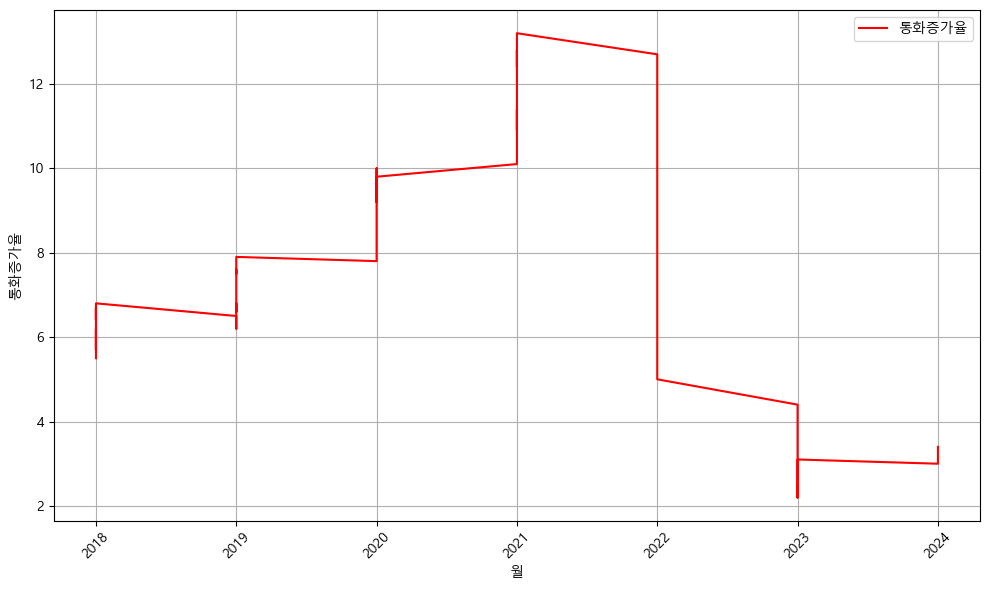

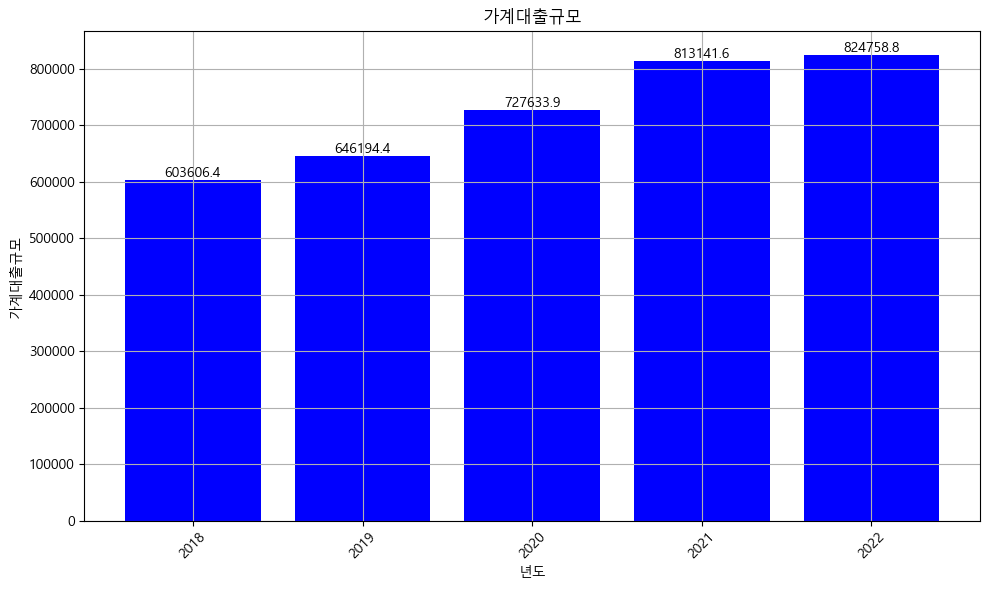

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기 및 컬럼 이름 수정
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
loan.columns = ['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준연도', '기준월', '지역']
# 2022년까지의 데이터만 필터링
loan = loan[loan['기준연도'] <= 2022]

m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
m2inflation.columns = ['기준연도', '기준월', '통화량', '인플레이션']

mhp = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/월간주택가격동향.csv')
mhp.columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']

# 통화증가율 그래프
plt.figure(figsize=(10, 6))
plt.plot(m2inflation['기준연도'], m2inflation['통화량'], label='통화증가율', color='red')
plt.xlabel('월')
plt.ylabel('통화증가율')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# m2inflation 그래프를 기준으로 loan 변수의 데이터를 막대그래프로 표시
plt.figure(figsize=(10, 6))
for year in m2inflation['기준연도'].unique():
    # 해당 연도의 데이터가 있는지 확인
    if year in loan['기준연도'].unique():
        max_value = loan.loc[loan['기준연도'] == year, '합계'].max()
        plt.bar(year, max_value, color='blue')
        plt.text(year, max_value, str(max_value), ha='center', va='bottom')
plt.title('가계대출규모')
plt.xlabel('년도')
plt.ylabel('가계대출규모')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 통화량, 인플레이션 과 가계대출규모에 대한 상관관계

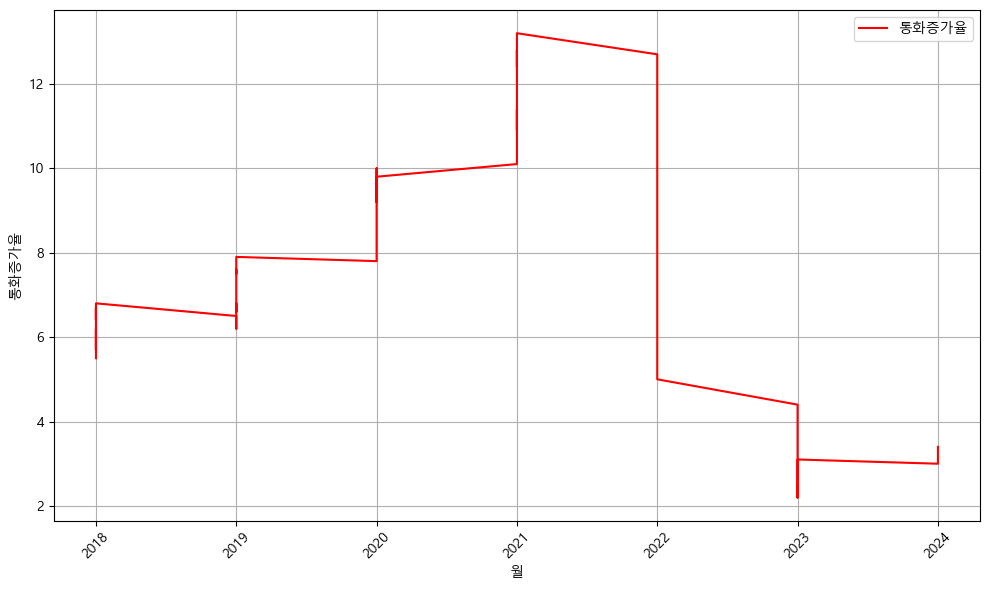

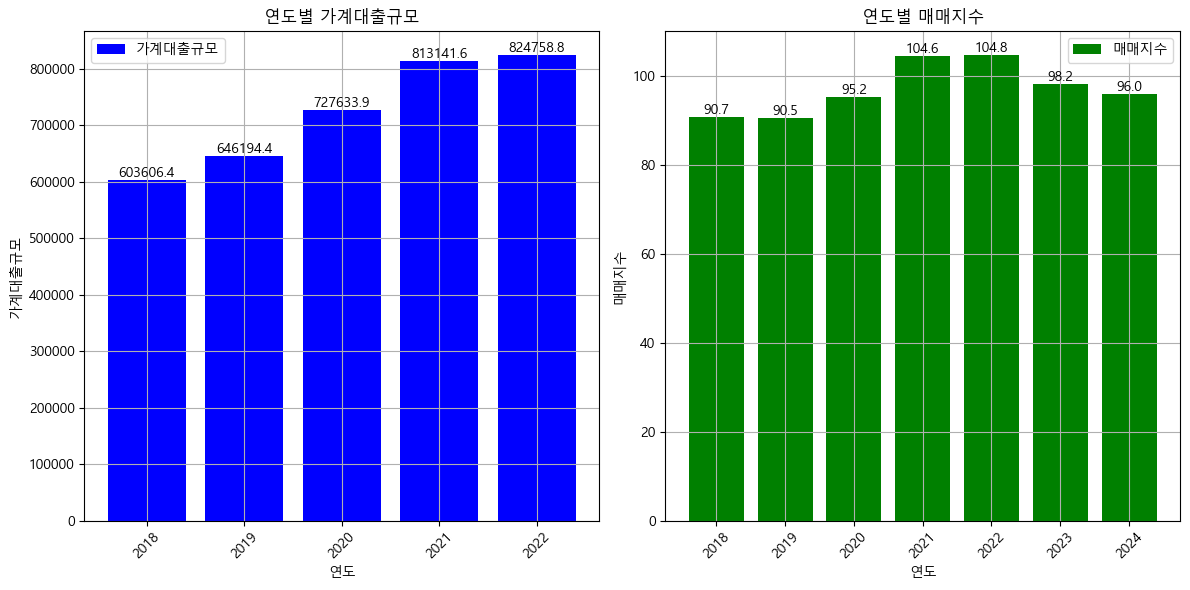

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 불러오기 및 컬럼 이름 수정
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
loan.columns = ['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준연도', '기준월', '지역']

m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
m2inflation.columns = ['기준연도', '기준월', '통화량', '인플레이션']

mhp = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/월간주택가격동향.csv')
mhp.columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']

# 연도별 데이터로 변환
loan_yearly = loan.groupby('기준연도')['합계'].max().reset_index()
mhp_yearly = mhp.groupby('기준연도')['매매지수'].max().reset_index()

# 통화증가율 그래프
plt.figure(figsize=(10, 6))
plt.plot(m2inflation['기준연도'], m2inflation['통화량'], label='통화증가율', color='red')
plt.xlabel('월')
plt.ylabel('통화증가율')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 가계대출규모 막대그래프
plt.subplot(1, 2, 1)
plt.bar(loan_yearly['기준연도'], loan_yearly['합계'], color='blue', label='가계대출규모')
for i, value in enumerate(loan_yearly['합계']):
    plt.text(loan_yearly['기준연도'][i], value, str(value), ha='center', va='bottom')
plt.title('연도별 가계대출규모')
plt.xlabel('연도')
plt.ylabel('가계대출규모')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# 매매지수 막대그래프
plt.subplot(1, 2, 2)
plt.bar(mhp_yearly['기준연도'], mhp_yearly['매매지수'], color='green', label='매매지수')
for i, value in enumerate(mhp_yearly['매매지수']):
    plt.text(mhp_yearly['기준연도'][i], value, str(value), ha='center', va='bottom')
plt.title('연도별 매매지수')
plt.xlabel('연도')
plt.ylabel('매매지수')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


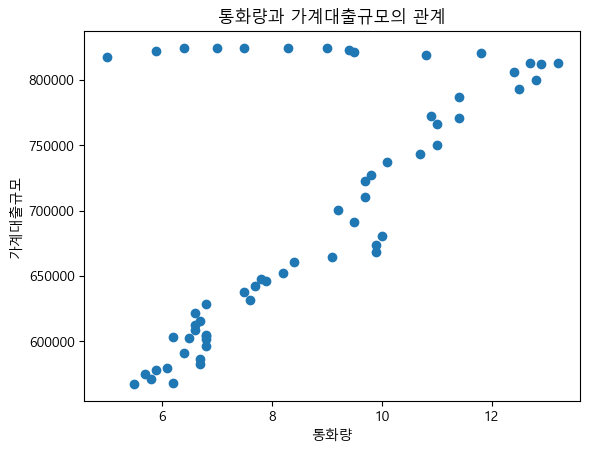

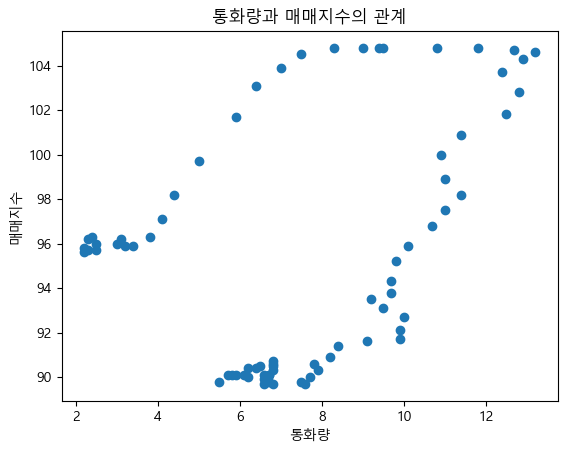

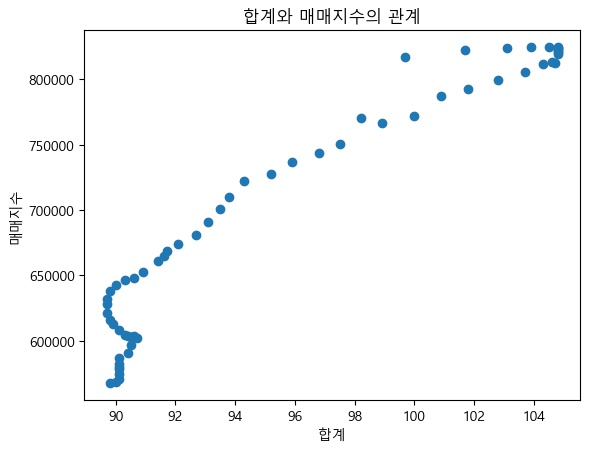

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# 열 이름 지정
loan.columns = ['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준연도', '기준월', '지역']
m2inflation.columns = ['기준연도', '기준월', '통화량', '인플레이션']
mhp.columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']

# 데이터 결합하기
merged_data1 = pd.merge(loan, m2inflation, on=['기준연도', '기준월'])
merged_data2 = pd.merge(mhp, m2inflation, on=['기준연도', '기준월'])
merged_data3 = pd.merge(loan, mhp, on=['기준연도', '기준월'])

# 데이터 시각화하기
plt.scatter(merged_data1['통화량'], merged_data1['합계'])
plt.xlabel('통화량')
plt.ylabel('가계대출규모')
plt.title('통화량과 가계대출규모의 관계')
plt.show()

plt.scatter(merged_data2['통화량'], merged_data2['매매지수'])
plt.xlabel('통화량')
plt.ylabel('매매지수')
plt.title('통화량과 매매지수의 관계')
plt.show()

plt.scatter(merged_data3['매매지수'], merged_data3['합계'])
plt.xlabel('합계')
plt.ylabel('매매지수')
plt.title('합계와 매매지수의 관계')
plt.show()


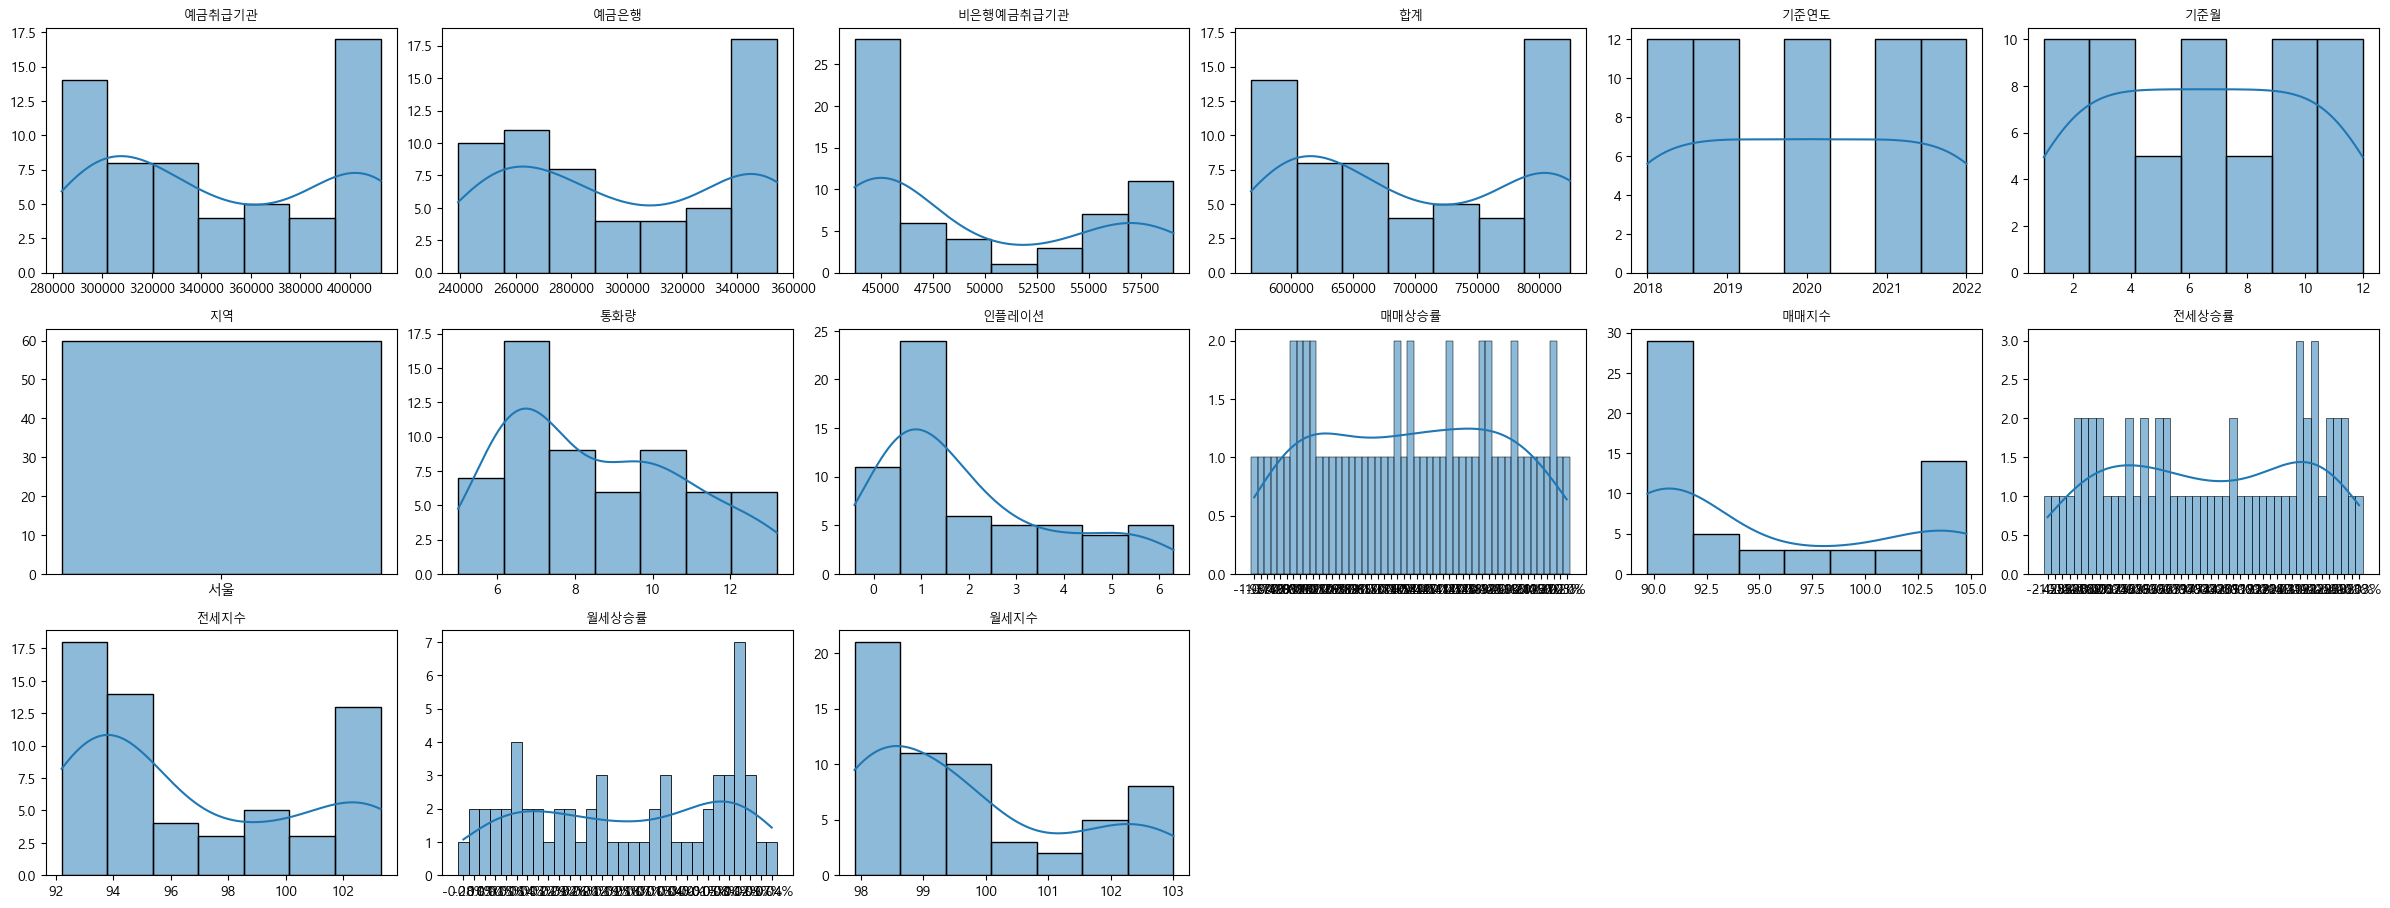

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# 변수들을 하나의 데이터프레임으로 결합
merged_data = pd.merge(loan, m2inflation, on=['기준연도', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# Creating a figure to contain the plots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24, 18))

# Flattening the array of axes for easy iteration
axes = axes.flatten()

# Loop through each column in the data except the date columns and plot histograms
for i, column in enumerate(merged_data.columns[1:]):  # Skipping '기준연도' and '기준월'
    sns.histplot(merged_data[column], kde=True, ax=axes[i])
    axes[i].set_title(column, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for ax in axes[i+1:]:
    ax.remove()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


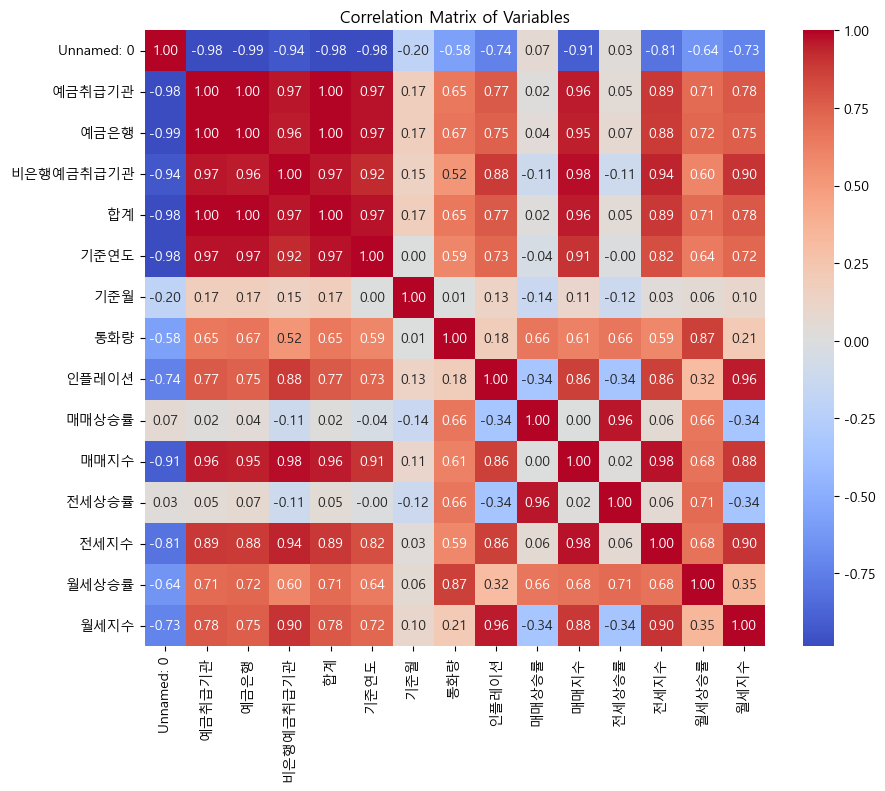

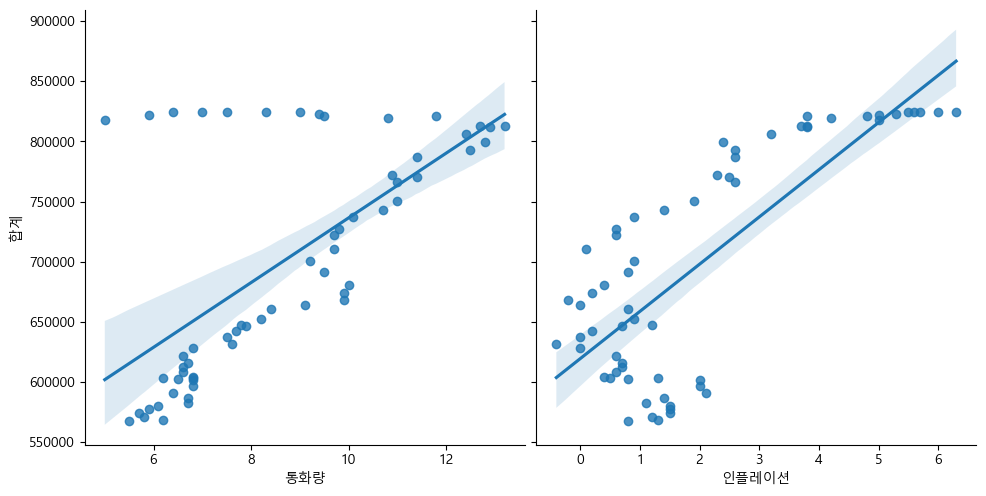

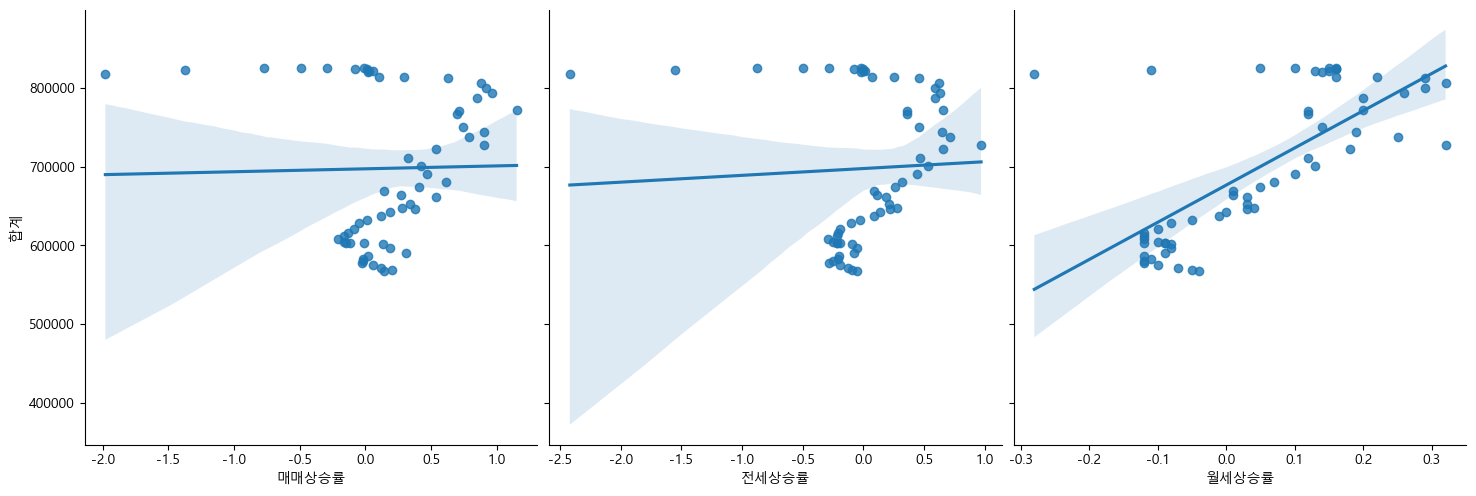

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# '%' 기호 제거 및 데이터 형식 변환
mhp['매매상승률'] = mhp['매매상승률'].str.replace('%', '').astype(float)
mhp['전세상승률'] = mhp['전세상승률'].str.replace('%', '').astype(float)
mhp['월세상승률'] = mhp['월세상승률'].str.replace('%', '').astype(float)

# 결측치 처리
mhp.fillna(0, inplace=True)

# 데이터 결합하기
merged_data = pd.merge(loan, m2inflation, left_on=['기준연도', '기준월'], right_on=['기준연도', '기준월'])
merged_data = pd.merge(merged_data, mhp, on=['기준연도', '기준월'])

# 숫자형 데이터만 있는 열 선택
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# 선택한 열로 상관 분석 수행
correlation_matrix = merged_data[numeric_columns].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

# 회귀 분석
sns.pairplot(merged_data, x_vars=['통화량', '인플레이션'], y_vars='합계', kind='reg', height=5)
sns.pairplot(merged_data, x_vars=['매매상승률', '전세상승률', '월세상승률'], y_vars='합계', kind='reg', height=5)
plt.show()


<Figure size 1400x700 with 0 Axes>

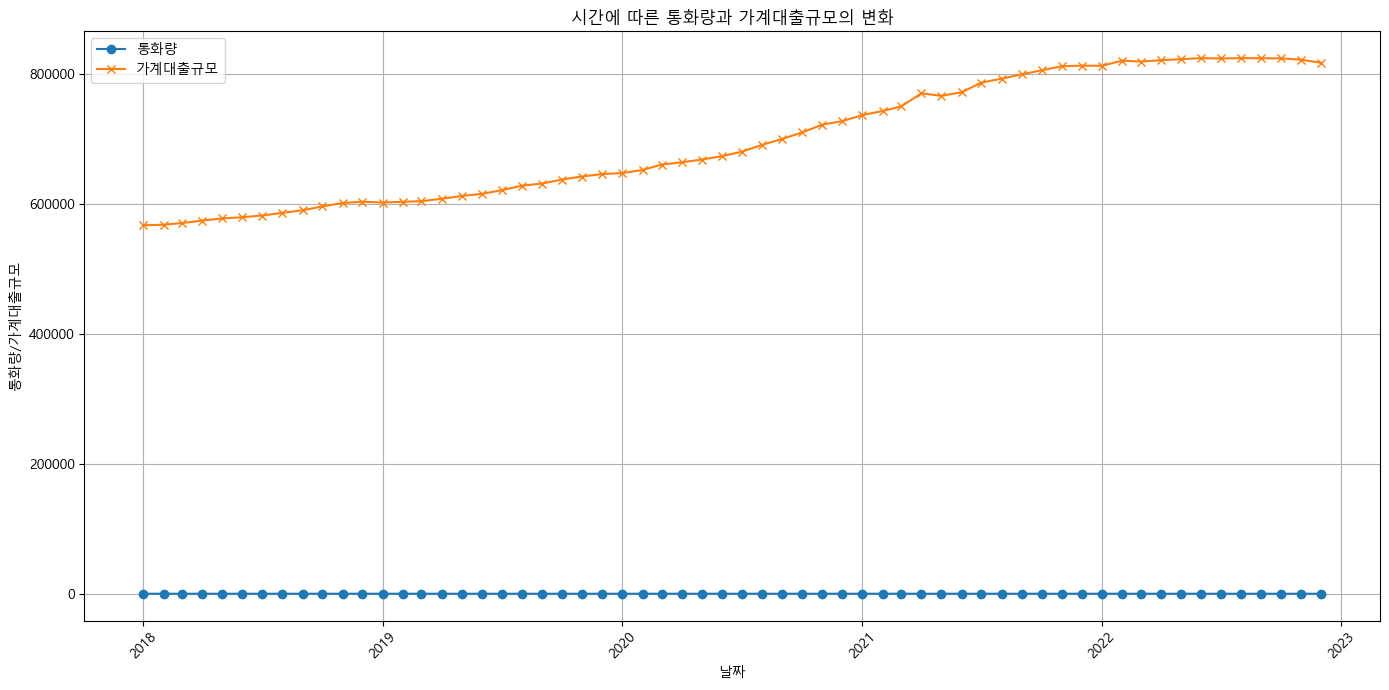

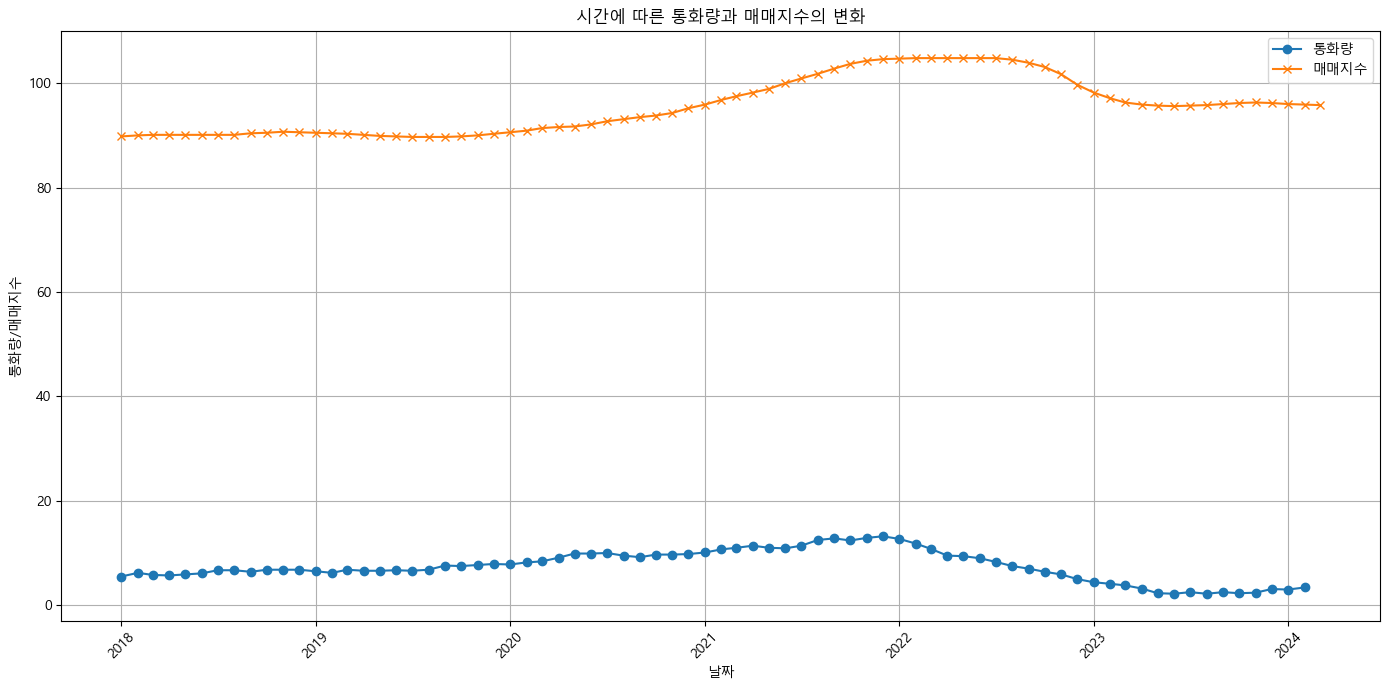

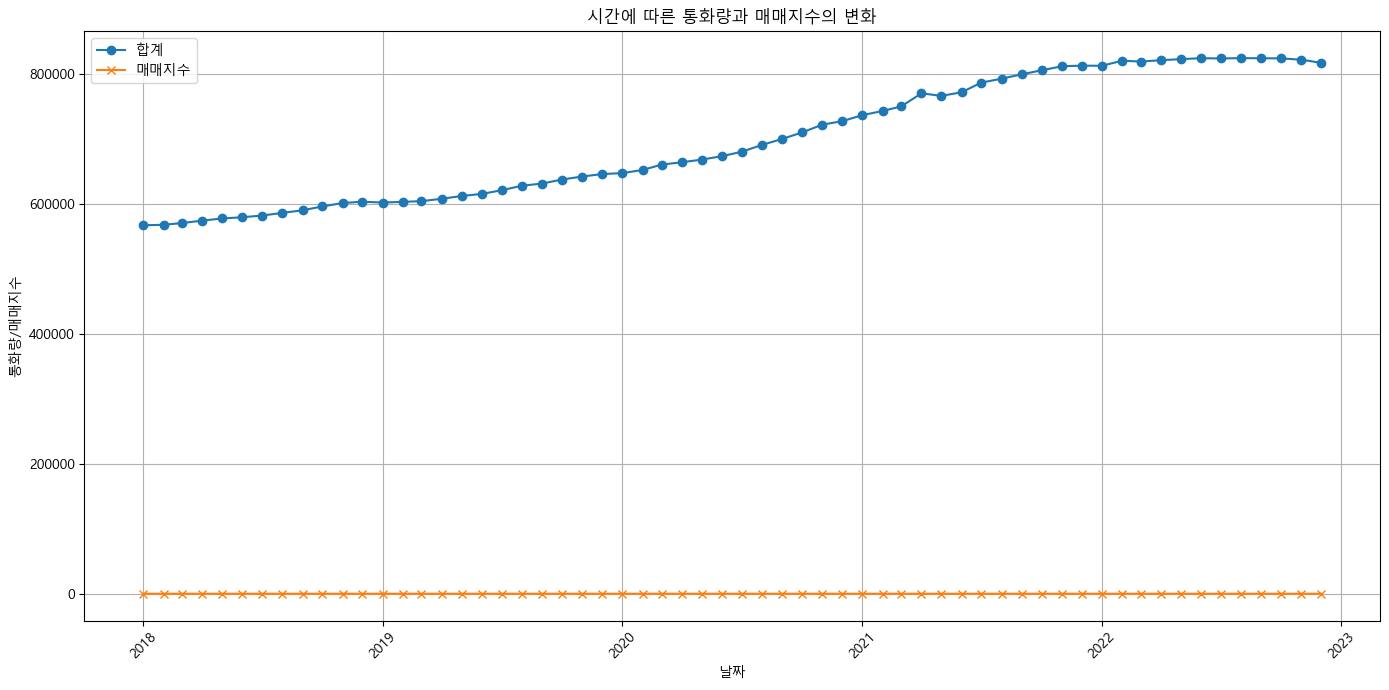

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')

# '기준연도'와 '기준월'을 기준으로 데이터 결합
merged_loan_m2inflation = pd.merge(loan, m2inflation, on=['기준연도', '기준월'])
merged_mhp_m2inflation = pd.merge(mhp, m2inflation, on=['기준연도', '기준월'])
merged_loan_mhp = pd.merge(mhp, loan, on=['기준연도', '기준월'])

# Create a datetime index from the '기준연도' and '기준월'
merged_loan_m2inflation['날짜'] = pd.to_datetime(merged_loan_m2inflation['기준연도'].astype(str) + '-' + merged_loan_m2inflation['기준월'].astype(str))
merged_mhp_m2inflation['날짜'] = pd.to_datetime(merged_mhp_m2inflation['기준연도'].astype(str) + '-' + merged_mhp_m2inflation['기준월'].astype(str))
merged_loan_mhp['날짜'] = pd.to_datetime(merged_loan_mhp['기준연도'].astype(str) + '-' + merged_loan_mhp['기준월'].astype(str))

# Plotting time series data for '통화량' and '합계' (from merged_loan_m2inflation) and '통화량' and '매매지수' (from merged_mhp_m2inflation)
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))

plt.plot(merged_loan_m2inflation['날짜'], merged_loan_m2inflation['통화량'], label='통화량', marker='o')
plt.plot(merged_loan_m2inflation['날짜'], merged_loan_m2inflation['합계'], label='가계대출규모', marker='x')

plt.title('시간에 따른 통화량과 가계대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('통화량/가계대출규모')  # y축 레이블 수정
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_mhp_m2inflation['날짜'], merged_mhp_m2inflation['통화량'], label='통화량', marker='o')
plt.plot(merged_mhp_m2inflation['날짜'], merged_mhp_m2inflation['매매지수'], label='매매지수', marker='x')

plt.title('시간에 따른 통화량과 매매지수의 변화')
plt.xlabel('날짜')
plt.ylabel('통화량/매매지수')  # y축 레이블 수정
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_loan_mhp['날짜'], merged_loan_mhp['합계'], label='합계', marker='o')
plt.plot(merged_loan_mhp['날짜'], merged_loan_mhp['매매지수'], label='매매지수', marker='x')

plt.title('시간에 따른 통화량과 매매지수의 변화')
plt.xlabel('날짜')
plt.ylabel('통화량/매매지수')  # y축 레이블 수정
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 통화 증가율에 따른 가계대출 규모와 매매지수의 흐름

In [102]:
# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')
ma = pd.read_excel('../EDA_Prj/DATASET/평균월세가격_아파트.xlsx')
la = pd.read_excel('../EDA_Prj/DATASET/평균전세가격_아파트.xlsx')
ba = pd.read_excel('../EDA_Prj/DATASET/평균매매가격_아파트.xlsx')
ma
m2inflation

,기준연도,기준월,통화량,인플레이션
0,2018,1,5.5,0.8
1,2018,2,6.2,1.3
2,2018,3,5.8,1.2
3,2018,4,5.7,1.5
4,2018,5,5.9,1.5
...,...,...,...,...
70,2023,11,2.4,3.3
71,2023,12,3.1,3.2
72,2024,1,3.0,2.8
73,2024,2,3.4,3.1


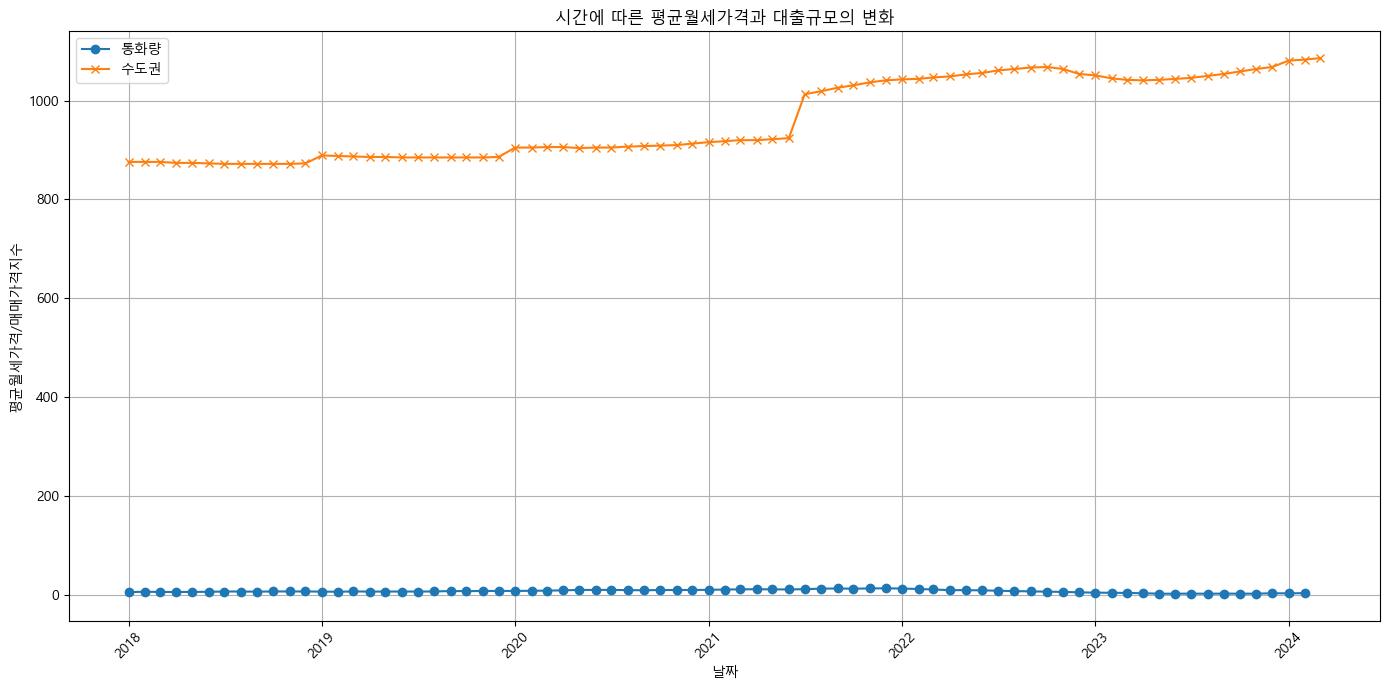

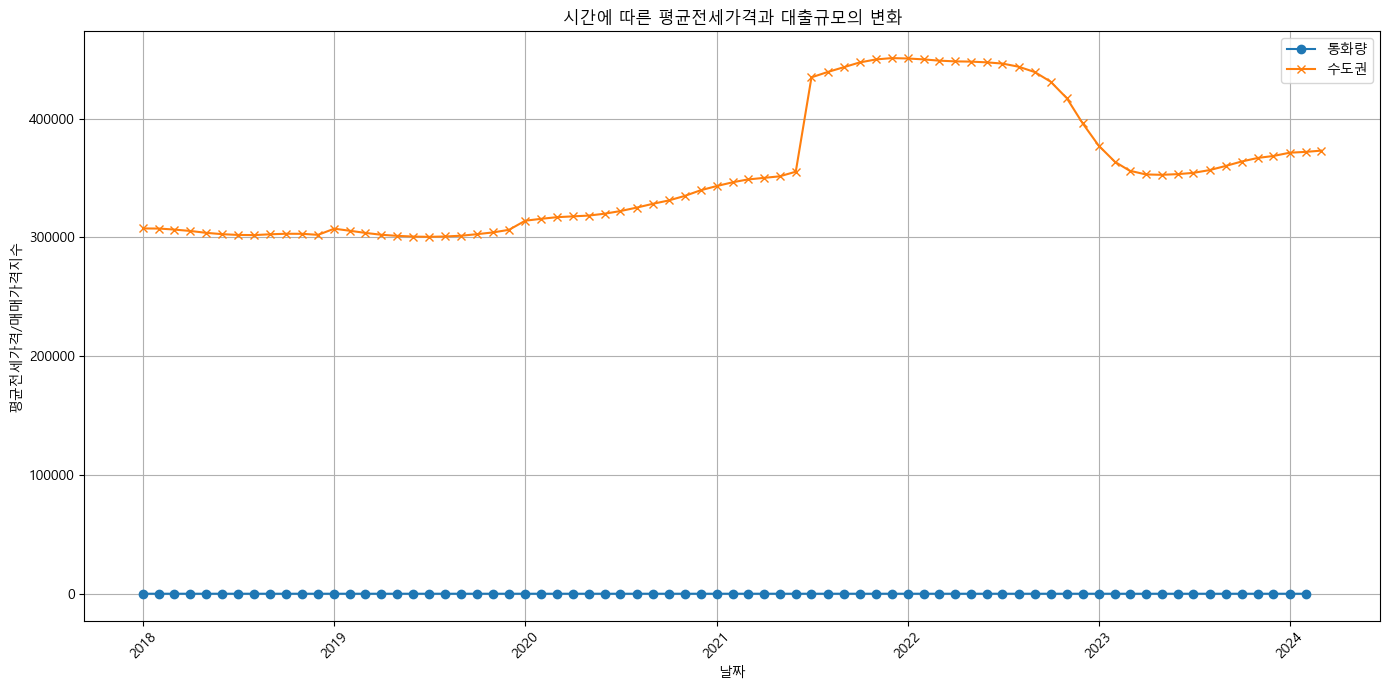

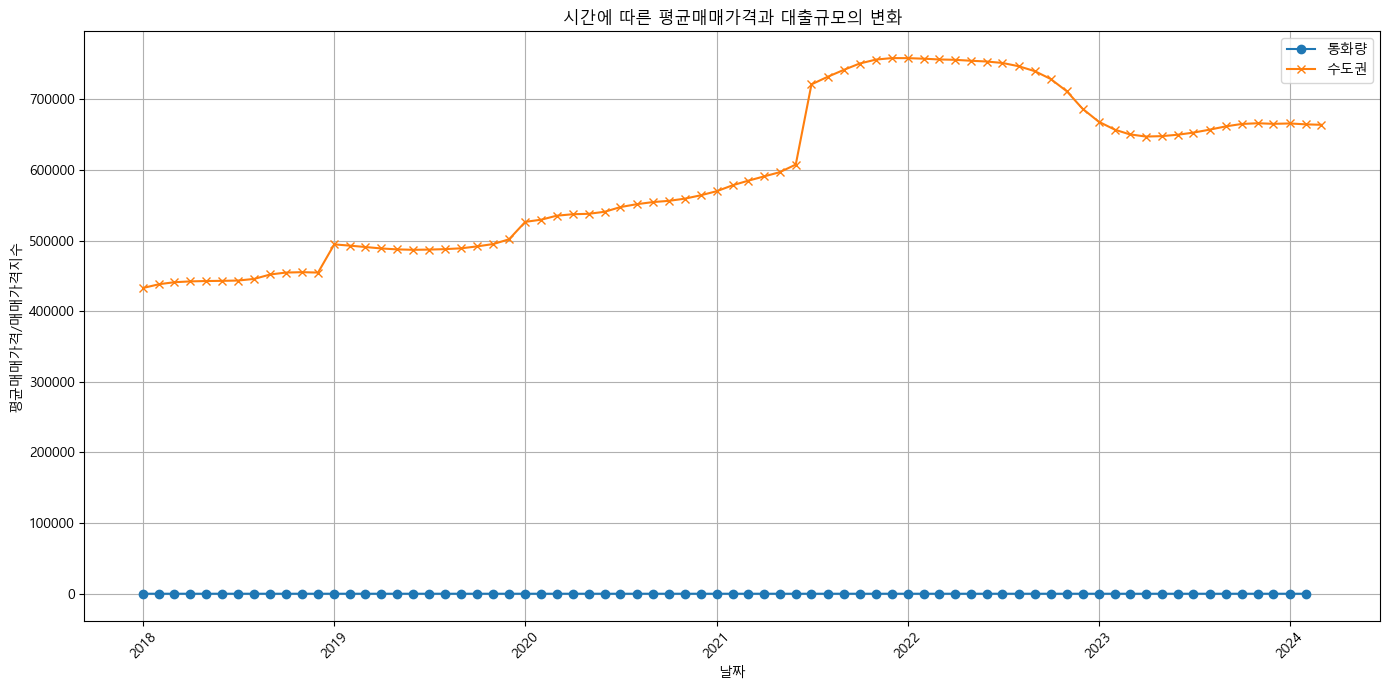

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽어오기
m2inflation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
ma = pd.read_excel('../EDA_Prj/DATASET/평균월세가격_아파트.xlsx')
la = pd.read_excel('../EDA_Prj/DATASET/평균전세가격_아파트.xlsx')
ba = pd.read_excel('../EDA_Prj/DATASET/평균매매가격_아파트.xlsx')

# '기준연도'와 '기준월'을 기준으로 데이터 결합
merged_ma_m2inflation = pd.merge(ma, m2inflation, on=['기준연도', '기준월'])
merged_la_m2inflation = pd.merge(la, m2inflation, on=['기준연도', '기준월'])
merged_ba_m2inflation = pd.merge(ba, m2inflation, on=['기준연도', '기준월'])

# Create a datetime index from the '기준연도' and '기준월'
merged_ma_m2inflation['날짜'] = pd.to_datetime(merged_ma_m2inflation['기준연도'].astype(str) + '-' + merged_ma_m2inflation['기준월'].astype(str))
merged_la_m2inflation['날짜'] = pd.to_datetime(merged_la_m2inflation['기준연도'].astype(str) + '-' + merged_la_m2inflation['기준월'].astype(str))
merged_ba_m2inflation['날짜'] = pd.to_datetime(merged_ba_m2inflation['기준연도'].astype(str) + '-' + merged_ba_m2inflation['기준월'].astype(str))

# 시각화
plt.figure(figsize=(14, 7))

plt.plot(merged_ma_m2inflation['날짜'], merged_ma_m2inflation['통화량'], label='통화량', marker='o')
plt.plot(merged_ma_m2inflation['날짜'], merged_ma_m2inflation['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균월세가격과 통화량 변화')
plt.xlabel('날짜') 
plt.ylabel('평균월세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_la_m2inflation['날짜'], merged_la_m2inflation['통화량'], label='통화량', marker='o')
plt.plot(merged_la_m2inflation['날짜'], merged_la_m2inflation['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균전세가격과 통화량 변화')
plt.xlabel('날짜')
plt.ylabel('평균전세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_ba_m2inflation['날짜'], merged_ba_m2inflation['통화량'], label='통화량', marker='o')
plt.plot(merged_ba_m2inflation['날짜'], merged_ba_m2inflation['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균매매가격과 통화량 변화')
plt.xlabel('날짜')
plt.ylabel('평균매매가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

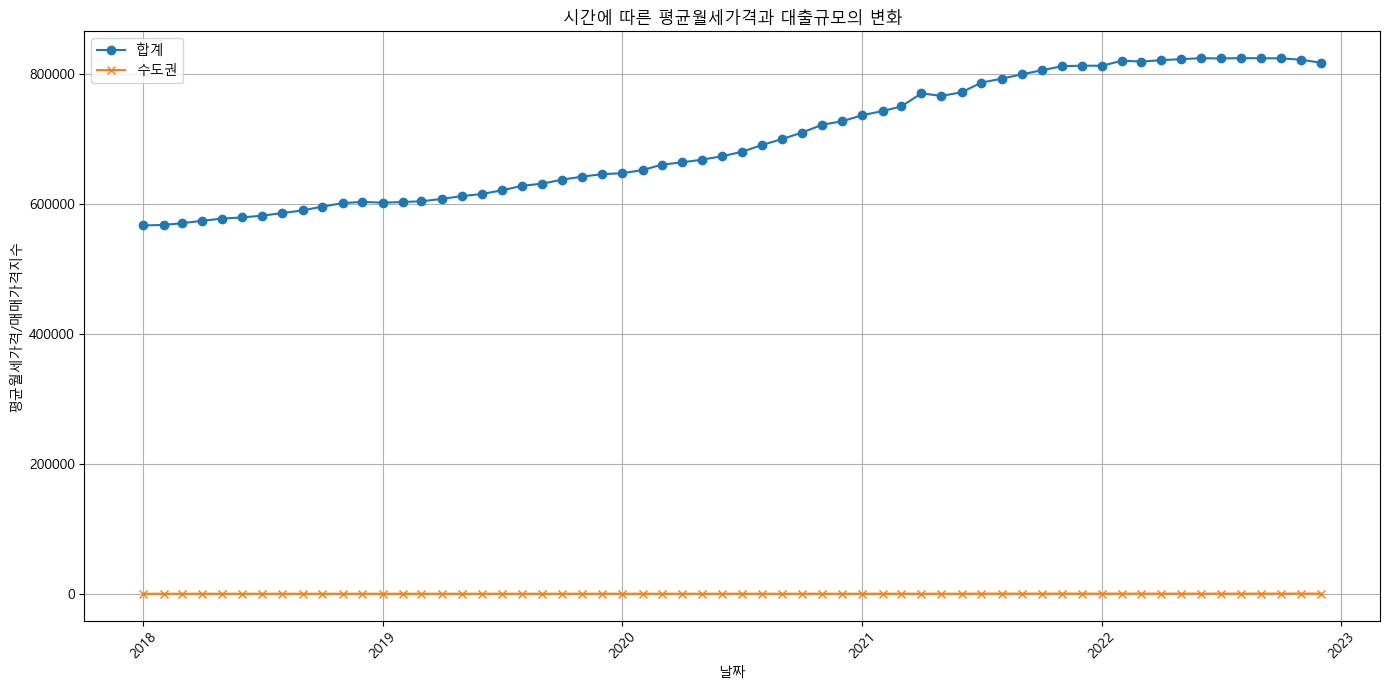

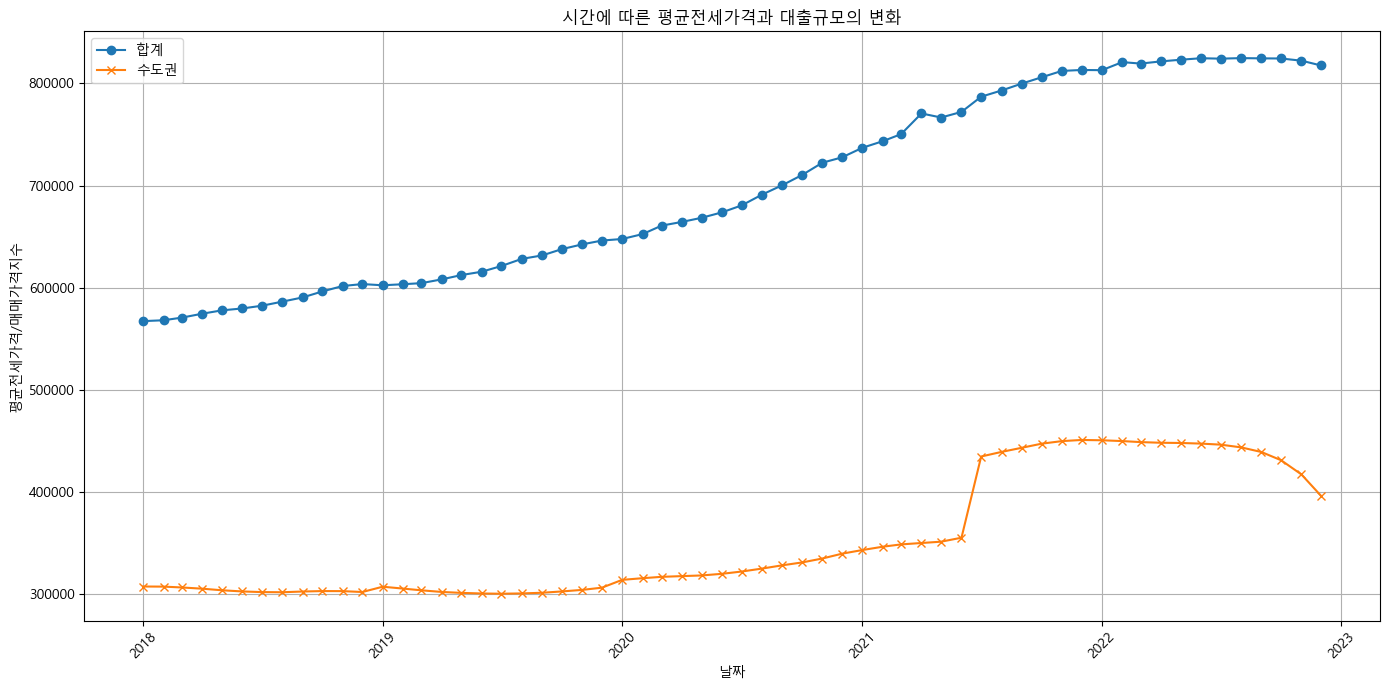

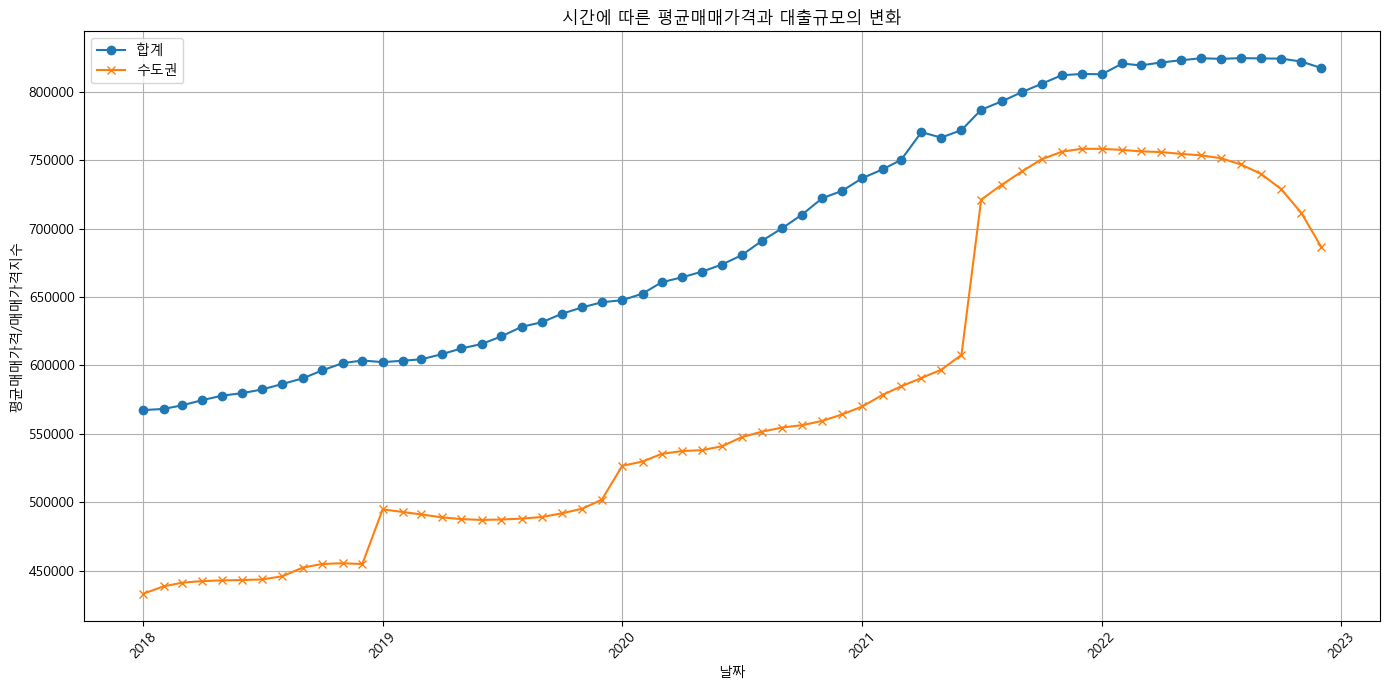

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 읽어오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
ma = pd.read_excel('../EDA_Prj/DATASET/평균월세가격_아파트.xlsx')
la = pd.read_excel('../EDA_Prj/DATASET/평균전세가격_아파트.xlsx')
ba = pd.read_excel('../EDA_Prj/DATASET/평균매매가격_아파트.xlsx')

# '기준연도'와 '기준월'을 기준으로 데이터 결합
merged_ma_loan = pd.merge(ma, loan, on=['기준연도', '기준월'])
merged_la_loan = pd.merge(la, loan, on=['기준연도', '기준월'])
merged_ba_loan = pd.merge(ba, loan, on=['기준연도', '기준월'])

# Create a datetime index from the '기준연도' and '기준월'
merged_ma_loan['날짜'] = pd.to_datetime(merged_ma_loan['기준연도'].astype(str) + '-' + merged_ma_loan['기준월'].astype(str))
merged_la_loan['날짜'] = pd.to_datetime(merged_la_loan['기준연도'].astype(str) + '-' + merged_la_loan['기준월'].astype(str))
merged_ba_loan['날짜'] = pd.to_datetime(merged_ba_loan['기준연도'].astype(str) + '-' + merged_ba_loan['기준월'].astype(str))

# 시각화
plt.figure(figsize=(14, 7))

plt.plot(merged_ma_loan['날짜'], merged_ma_loan['합계'], label='합계', marker='o')
plt.plot(merged_ma_loan['날짜'], merged_ma_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균월세가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균월세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_la_loan['날짜'], merged_la_loan['합계'], label='합계', marker='o')
plt.plot(merged_la_loan['날짜'], merged_la_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균전세가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균전세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_ba_loan['날짜'], merged_ba_loan['합계'], label='합계', marker='o')
plt.plot(merged_ba_loan['날짜'], merged_ba_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균매매가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균매매가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

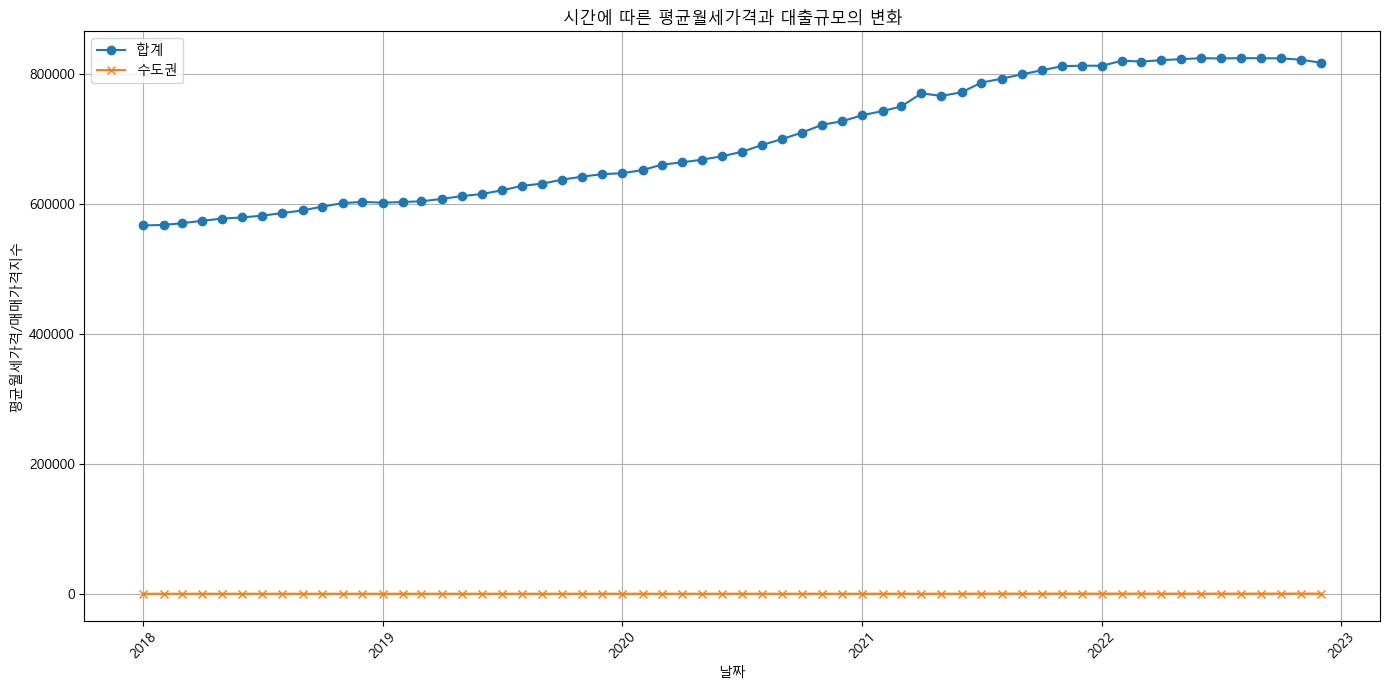

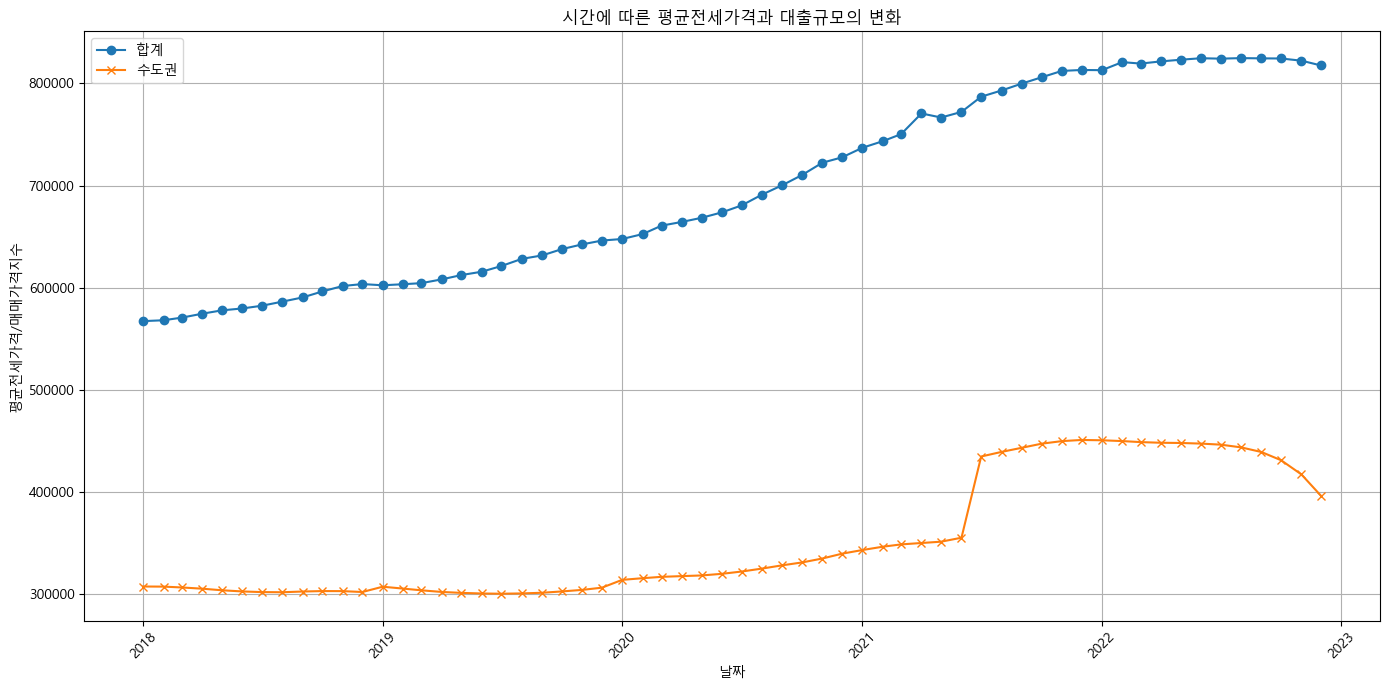

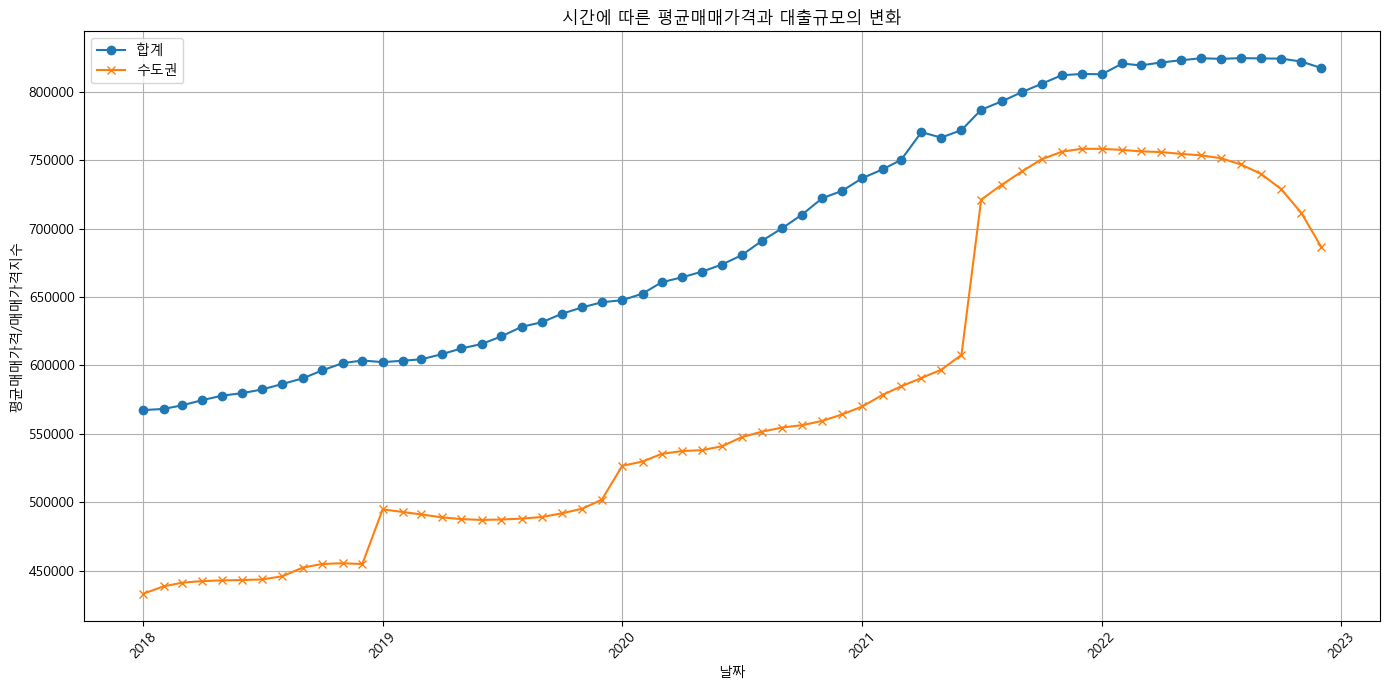

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib

Report loan_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Li

Report m2inflation_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Li

Report mhp_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

# 데이터 불러오기
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
ma = pd.read_excel('../EDA_Prj/DATASET/평균월세가격_아파트.xlsx')
la = pd.read_excel('../EDA_Prj/DATASET/평균전세가격_아파트.xlsx')
ba = pd.read_excel('../EDA_Prj/DATASET/평균매매가격_아파트.xlsx')

# '기준연도'와 '기준월'을 기준으로 데이터 결합
merged_ma_loan = pd.merge(ma, loan, on=['기준연도', '기준월'])
merged_la_loan = pd.merge(la, loan, on=['기준연도', '기준월'])
merged_ba_loan = pd.merge(ba, loan, on=['기준연도', '기준월'])

# Create a datetime index from the '기준연도' and '기준월'
merged_ma_loan['날짜'] = pd.to_datetime(merged_ma_loan['기준연도'].astype(str) + '-' + merged_ma_loan['기준월'].astype(str))
merged_la_loan['날짜'] = pd.to_datetime(merged_la_loan['기준연도'].astype(str) + '-' + merged_la_loan['기준월'].astype(str))
merged_ba_loan['날짜'] = pd.to_datetime(merged_ba_loan['기준연도'].astype(str) + '-' + merged_ba_loan['기준월'].astype(str))

# 시각화
plt.figure(figsize=(14, 7))

plt.plot(merged_ma_loan['날짜'], merged_ma_loan['합계'], label='합계', marker='o')
plt.plot(merged_ma_loan['날짜'], merged_ma_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균월세가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균월세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_la_loan['날짜'], merged_la_loan['합계'], label='합계', marker='o')
plt.plot(merged_la_loan['날짜'], merged_la_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균전세가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균전세가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(merged_ba_loan['날짜'], merged_ba_loan['합계'], label='합계', marker='o')
plt.plot(merged_ba_loan['날짜'], merged_ba_loan['수도권'], label='수도권', marker='x')

plt.title('시간에 따른 평균매매가격과 대출규모의 변화')
plt.xlabel('날짜')
plt.ylabel('평균매매가격/매매가격지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# loan 데이터프레임에 대한 Sweetviz 보고서 생성
loan_report = sv.analyze(loan)
loan_report.show_html(filepath="loan_report.html")

# m2inflation 데이터프레임에 대한 Sweetviz 보고서 생성
m2inflation_report = sv.analyze(m2inflation)
m2inflation_report.show_html(filepath="m2inflation_report.html")

# mhp 데이터프레임에 대한 Sweetviz 보고서 생성
mhp_report = sv.analyze(mhp)
mhp_report.show_html(filepath="mhp_report.html")


C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}

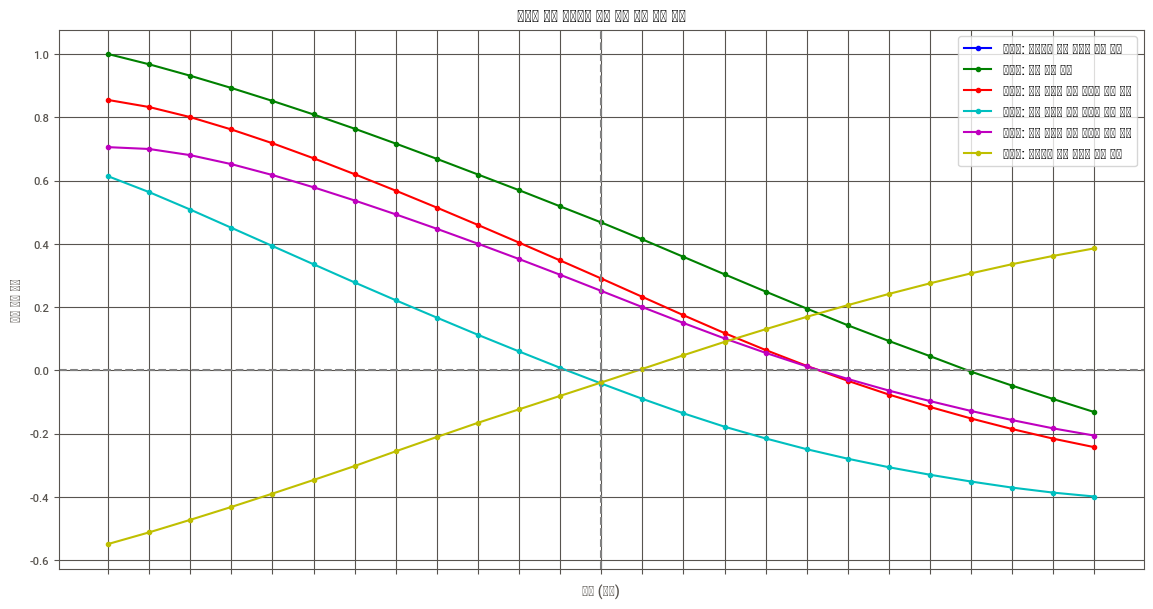

In [129]:
from statsmodels.tsa.stattools import ccf

# TLCC에 필요한 관련 컬럼 선택
columns = ['통화량', '합계', '매매지수', '월세지수', '전세지수', '수도권']
lags = range(-12, 13)  # -12에서 12까지의 시차

# 각 변수의 색상 정의
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 매매지수와의 각 변수의 시간 지연 교차 상관 계산
tlcc_results = {}
for col, color in zip(columns, colors):
    if col == '통화량':
        tlcc_results['초록색: 통화량과 대출 규모의 상관 관계'] = ccf(m2inflation['통화량'], loan['합계'], adjusted=False)[:len(lags)]
    elif col == '합계':
        tlcc_results['파란색: 대출 규모 자체'] = ccf(loan['합계'], loan['합계'], adjusted=False)[:len(lags)]
    elif col == '매매지수':
        tlcc_results['빨간색: 매매 지수와 대출 규모의 상관 관계'] = ccf(mhp['매매지수'], loan['합계'], adjusted=False)[:len(lags)]
    elif col == '월세지수':
        tlcc_results['보라색: 월세 지수와 대출 규모의 상관 관계'] = ccf(mhp['월세지수'], loan['합계'], adjusted=False)[:len(lags)]
    elif col == '전세지수':
        tlcc_results['검은색: 전세 지수와 대출 규모의 상관 관계'] = ccf(mhp['전세지수'], loan['합계'], adjusted=False)[:len(lags)]
    elif col == '수도권':
        tlcc_results['하늘색: 수도권과 대출 규모의 상관 관계'] = ccf(ba['수도권'], loan['합계'], adjusted=False)[:len(lags)]


# TLCC 결과 그리기
plt.figure(figsize=(14, 7))
for label, values, color in zip(tlcc_results.keys(), tlcc_results.values(), colors):
    plt.plot(lags, values, marker='o', label=label, color=color)

plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('아파트 매매 지수와의 시간 지연 교차 상관 관계')
plt.xlabel('시차 (개월)')
plt.ylabel('교차 상관 관계')
plt.legend()
plt.grid(True)

# 연도 표시를 위한 x축 눈금 설정
years = range(2018, 202)
plt.xticks(lags, years, rotation=45)

plt.show()